> # Read The Data, Acquire the main libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

__Get The Data__

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.duplicated().sum()

0

> There are 207 nulls total_bedrooms

In [74]:
# The Percentage of null values
df['total_bedrooms'].isna().sum() / df.shape[0] * 100

1.002906976744186

In [4]:
# we'll drop the nan values
df.dropna(inplace=True)

# EDA

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [10]:
df.corr()['median_house_value']

longitude            -0.045398
latitude             -0.144638
housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

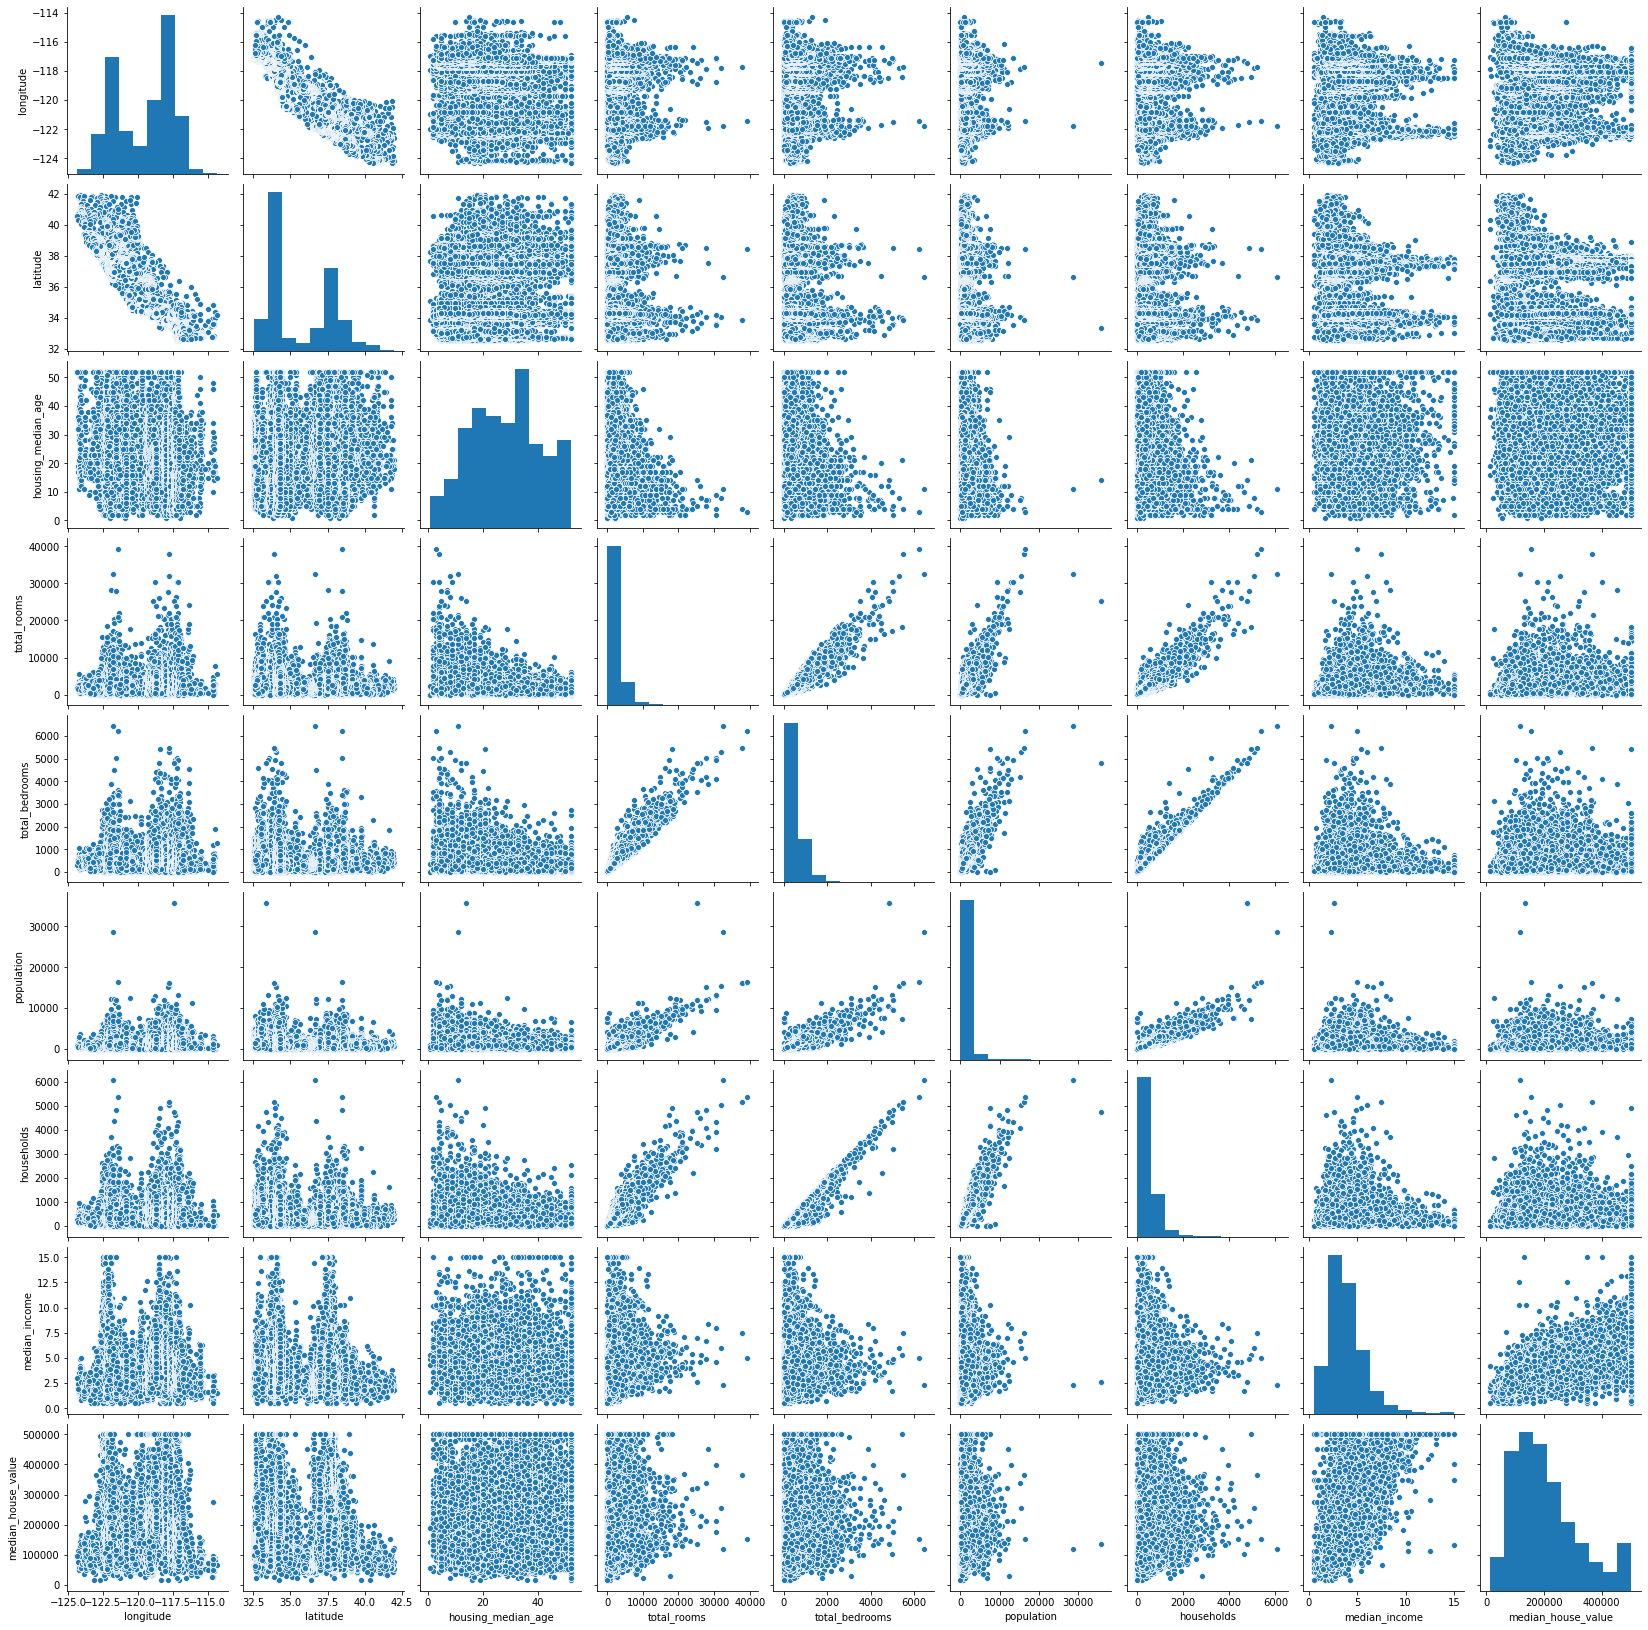

In [11]:
sns.pairplot(df)
plt.show()

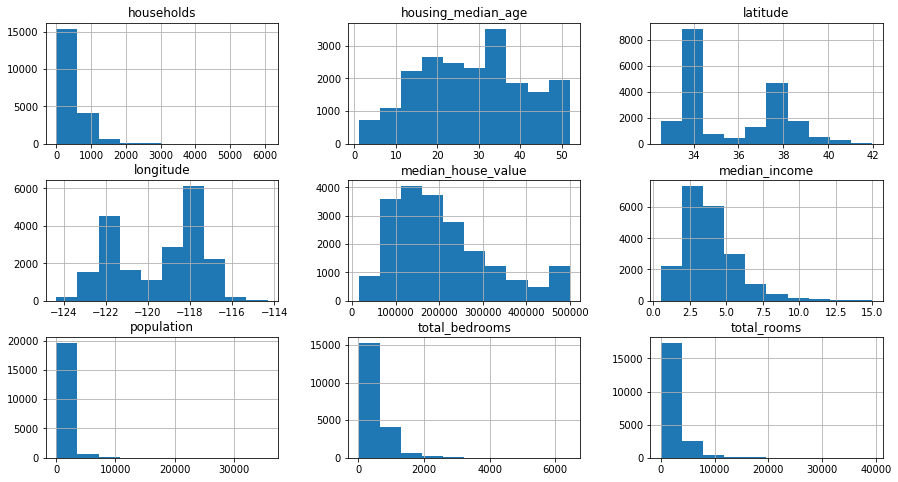

In [12]:
df.hist(figsize=(15, 8))
plt.show()

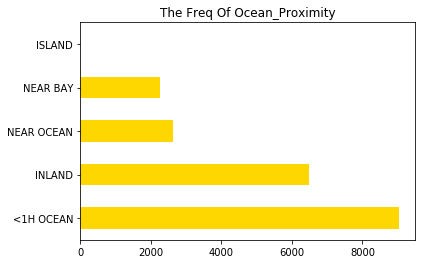

In [13]:
df["ocean_proximity"].value_counts().plot(kind='barh', color='gold')
plt.title("The Freq Of Ocean_Proximity")
plt.show()

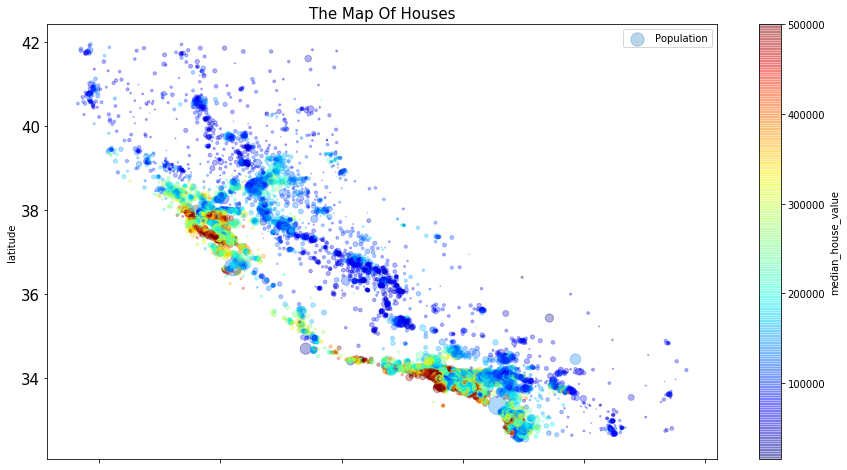

In [14]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, cmap=plt.get_cmap("jet"),
           s=df['population']/100, c='median_house_value', label='Population', figsize=(15, 8), fontsize=15, colorbar=True)
plt.title("The Map Of Houses", fontsize=15)
plt.legend()
plt.show()

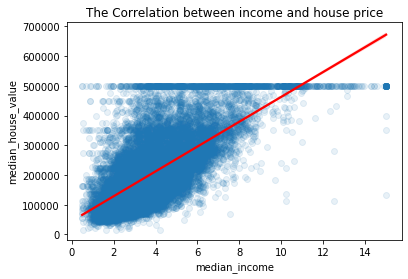

In [15]:
sns.regplot(x='median_income', y='median_house_value', data=df, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
plt.title("The Correlation between income and house price")
plt.show()

> # Feature Engineering 

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


> __new columns__
1. rooms per household
2. bedrooms per room
3. population per households 

In [11]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [13]:
corr = df.iloc[:,-3:].corr()
corr.style.background_gradient(cmap='coolwarm')

,rooms_per_household,bedrooms_per_room,population_per_household
rooms_per_household,1.000000,-0.416952,-0.004873
bedrooms_per_room,-0.416952,1.000000,0.002938
population_per_household,-0.004873,0.002938,1.000000


# Feature Scaling & Label Encoding 

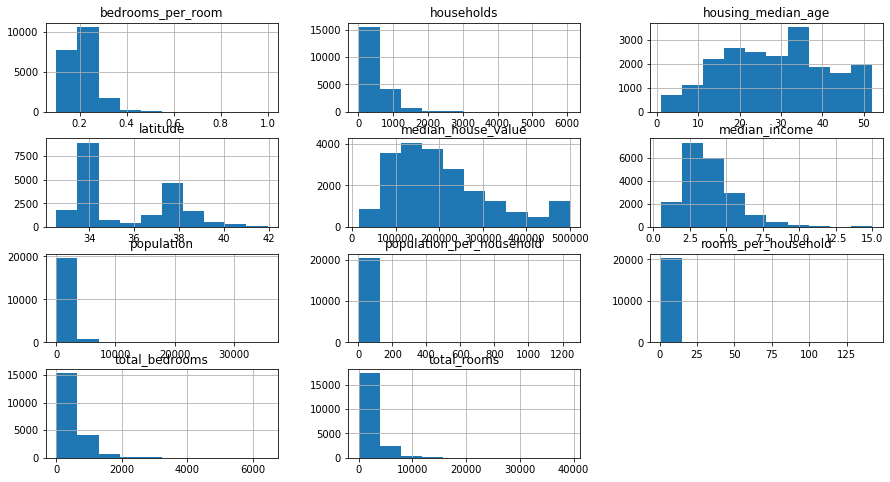

In [14]:
df.iloc[:,1:].hist(figsize=(15, 8))
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [29]:
temp_df = df.drop(["bedrooms_per_room","latitude", "longitude", "ocean_proximity", "median_house_value"],axis=1)
columns = temp_df.columns

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = StandardScaler()

In [32]:
stand_df = df.copy()
norm_df = df.copy()

In [33]:
stand_df[columns] = scaler.fit_transform(df[columns])

In [34]:
scaler = MinMaxScaler()

In [35]:
norm_df[columns] = scaler.fit_transform(df[columns])

In [37]:
stand_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,452600.0,3,0.625395,0.146591,-0.049433
1,-122.22,37.86,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,358500.0,3,0.324942,0.155797,-0.092134
2,-122.24,37.85,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,352100.0,3,1.150594,0.129516,-0.025797
3,-122.25,37.85,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,341300.0,3,0.155467,0.184458,-0.050162
4,-122.25,37.85,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,342200.0,3,0.342549,0.172096,-0.085272


In [38]:
norm_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,3,0.043512,0.146591,0.001499
1,-122.22,37.86,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,3,0.038224,0.155797,0.001141
2,-122.24,37.85,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,3,0.052756,0.129516,0.001698
3,-122.25,37.85,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,3,0.035241,0.184458,0.001493
4,-122.25,37.85,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,3,0.038534,0.172096,0.001198


In [84]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

> # Modelling

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = stand_df.drop("median_house_value", axis=1).values
y = stand_df.median_house_value.values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

In [44]:
X_train.shape

(16346, 12)

In [45]:
y_train.shape

(16346,)

__Linear Regression__

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.score(X_train, y_train)

0.6494541656647916

In [50]:
model.score(X_test, y_test)

0.6323628614489708

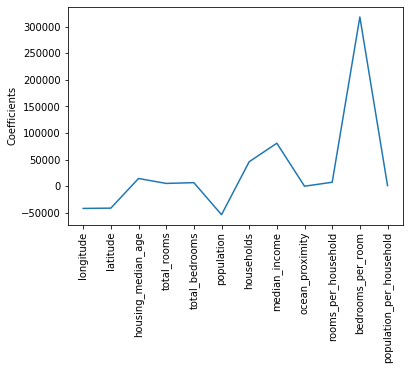

In [52]:
from sklearn.linear_model import Lasso
names = df.drop('median_house_value', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

In [21]:
lasso.score(X_test, y_test)

0.6323647669965196

In [39]:
np.where(np.logical_or((lasso_coef > lasso_coef[2]), (lasso_coef < lasso_coef[1])))

(array([ 0,  5,  6,  7, 10], dtype=int64),)

In [53]:
top_columns = names[np.where(lasso_coef[3:])]

__For Standrization__

In [54]:
X = stand_df[top_columns]

In [55]:
X.shape

(20433, 9)

In [56]:
y.shape

(20433,)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

__XGBRegressor__

In [58]:
# pip install xgboost

In [59]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [60]:
model = XGBRegressor(objective = "reg:linear", max_deepth=15, seed=100,n_estimators=100, bosster = "gblinear")

In [61]:
model.fit(X_train, y_train)

[22:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "bosster", "max_deepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', bosster='gblinear',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_deepth=15, max_delta_step=0, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, subsample=1, tree_method='exact', ...)

In [62]:
model.score(X_test, y_test)

0.8316800986130872

__For Normalization__

In [66]:
model = XGBRegressor(objective = "reg:linear", max_deepth=15, seed=100,n_estimators=100, bosster = "gblinear")

In [67]:
X = norm_df[top_columns]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

In [69]:
model.fit(X_train, y_train)

[22:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "bosster", "max_deepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', bosster='gblinear',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_deepth=15, max_delta_step=0, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, subsample=1, tree_method='exact', ...)

In [70]:
model.score(X_test, y_test)

0.831667369874986

In [106]:
# logs for (population and total_bedrooms)

In [79]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467


In [80]:
df[["population", "total_bedrooms"]] = np.log10(df[["population", "total_bedrooms"]])

In [81]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,2.110590,2.507856,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,3.043755,3.380392,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,2.278754,2.695482,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,2.371068,2.746634,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,2.447158,2.752048,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467


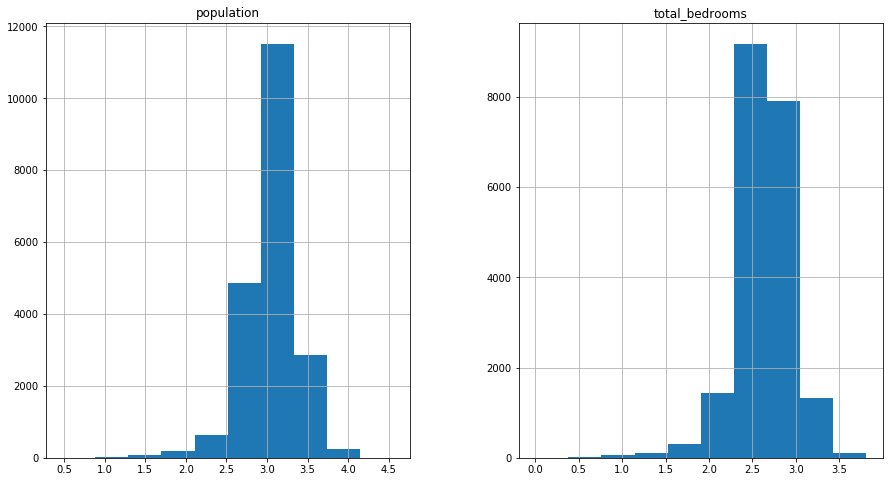

In [82]:
df[["population", "total_bedrooms"]].hist(figsize=(15, 8))
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()

In [101]:
X = df.drop('median_house_value', axis=1).values

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

In [103]:
model.fit(X_train, y_train)

LinearRegression()

In [104]:
model.score(X_test, y_test)

0.6631524353751863

In [105]:
scaler = MinMaxScaler()

In [106]:
df[columns] = scaler.fit_transform(df[columns])

In [107]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,0.784314,0.022331,0.554074,0.498300,0.020556,0.539668,452600.0,3,0.043512,0.146591,0.001499
1,-122.22,37.86,0.392157,0.180503,0.799049,0.712402,0.186976,0.538027,358500.0,3,0.038224,0.155797,0.001141
2,-122.24,37.85,1.000000,0.037260,0.598220,0.544339,0.028943,0.466028,352100.0,3,0.052756,0.129516,0.001698
3,-122.25,37.85,1.000000,0.032352,0.622454,0.556891,0.035849,0.354699,341300.0,3,0.035241,0.184458,0.001493
4,-122.25,37.85,1.000000,0.041330,0.642430,0.558219,0.042427,0.230776,342200.0,3,0.038534,0.172096,0.001198


In [110]:
model = LinearRegression()
X = df.drop('median_house_value', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [112]:
model = XGBRegressor(objective = "reg:linear", max_deepth=15, seed=100,n_estimators=100, bosster = "gblinear")

In [113]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

[22:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "bosster", "max_deepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.8200724454392877